# 导入包

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 导入数据

In [4]:
residualIm=pd.read_excel(r"./data/残耗.xlsx")
residualIm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       9000 non-null   object 
 1   污染标注     9000 non-null   float64
 2   v2样品序列   8961 non-null   float64
 3   v1合成剂    8628 non-null   float64
 4   v3燃料类型   8466 non-null   float64
 5   v2添加渠道   8528 non-null   float64
 6   v1执勤时效1  8462 non-null   float64
 7   助燃点      8993 non-null   float64
 8   烟碱量      8159 non-null   float64
 9   气体综合     8803 non-null   float64
 10  消耗烟脂     5128 non-null   float64
 11  吸阻       8861 non-null   float64
 12  吸阻过滤     6082 non-null   float64
 13  检查点位     4002 non-null   float64
 14  圆周点位     5713 non-null   float64
 15  焦油量      5907 non-null   float64
 16  助燃添加     8621 non-null   float64
 17  助燃反应     9000 non-null   float64
 18  烟碱HW     5984 non-null   float64
 19  钾元素      4920 non-null   float64
 20  钠元素      5718 non-null   float64
 21  助燃柠檬     7829 

# 缺失值填补

In [5]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base#missingpy包辅助项
#---------------------------------------
from missingpy import MissForest

imbImput=MissForest(n_estimators=10,min_samples_leaf=4000)                                   #缺失值填补
residMiss=imbImput.fit_transform(residualIm.iloc[:,[*range(1,33)]])
dataResid=pd.DataFrame(residMiss,columns=residualIm.iloc[:,[*range(1,33)]].columns)
dataResid

Iteration: 0
Iteration: 1


,污染标注,v2样品序列,v1合成剂,v3燃料类型,v2添加渠道,v1执勤时效1,助燃点,烟碱量,气体综合,消耗烟脂,...,过滤时效,噪声,温控,偏离位,标注,起点位,撤回点位,收紧度,通路,lHH
0,0.0,1.0,2.0,2.000000,4.0,1.0,210.647,1191.000000,1613.4,34.919585,...,450.4,14.920000,21.400000,203.0,47.640,87.887,181.4,19.500,32.573,2222.400000
1,0.0,1.0,1.0,1.000000,4.0,1.0,48.473,285.000000,465.4,30.400000,...,403.4,6.427000,28.400000,94.0,38.560,38.560,107.4,61.487,43.053,25528.400000
2,0.0,1.0,1.0,1.000000,2.0,1.0,96.733,670.000000,1092.4,31.900000,...,224.4,11.113000,87.400000,460.0,94.773,64.827,441.4,31.660,34.173,1884.400000
3,0.0,1.0,2.0,2.480156,2.0,1.0,67.380,2316.000000,3496.4,30.300000,...,171.4,6.153000,28.400000,364.0,45.720,45.720,377.4,5.273,30.467,5882.400000
4,0.0,1.0,2.0,2.000000,4.0,1.0,59.107,606.000000,1137.4,34.919585,...,680.4,5.133000,30.400000,106.0,45.580,40.237,128.4,5.260,30.433,20894.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.0,1.0,1.0,2.000000,4.0,1.0,34.200,51.000000,126.4,34.919585,...,946.4,9.171401,40.400000,142.0,31.227,48.631,160.4,57.607,44.060,208.400000
8996,0.0,1.0,1.0,1.000000,2.0,1.0,39.307,9.000000,79.4,34.919585,...,465.4,9.171401,32.303171,85.0,103.687,81.906,102.4,14.287,30.720,11917.636129
8997,0.0,1.0,2.0,3.000000,2.0,1.0,96.560,48.000000,244.4,34.919585,...,2185.4,9.171401,-18.600000,2695.0,292.747,224.084,779.4,30.573,34.860,11917.636129
8998,0.0,1.0,2.0,1.000000,1.0,1.0,28.613,1288.988283,50.4,34.919585,...,122.4,4.979000,24.400000,193.0,28.573,36.942,300.4,17.240,33.907,11917.636129


# 构建平衡模型
## 随机森林模型

In [8]:
from imblearn.ensemble import BalancedRandomForestClassifier as BRFC

xImb,yImb=dataResid.iloc[:,1:],dataResid.iloc[:,0]
brfc_clf=BRFC(n_estimators=50,max_depth=3,min_samples_leaf=50,random_state=123,max_features=5)#构建平衡模型
brfc_clf.fit(xImb,yImb)
brfc_clf.score(xImb,yImb)

0.9471111111111111

In [ ]:
# imblearn提供的平衡器模型
from imblearn.ensemble import  BalancedRandomForestClassifier,BalancedBaggingClassifier,EasyEnsembleClassifier,RUSBoostClassifier

## 变量重要性

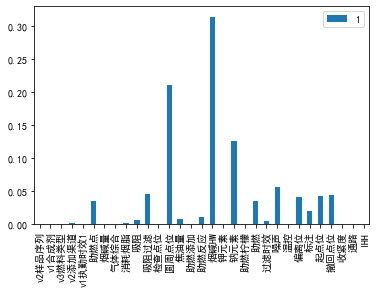

In [42]:
feaImpor=pd.DataFrame((zip(residualIm.iloc[:,[*range(2,33)]].columns.tolist(),
                           brfc_clf.feature_importances_.round(3).tolist()))
                     ,index=residualIm.iloc[:,[*range(2,33)]].columns)
feaImpor.plot.bar();

## 产生预测

In [62]:
brfc_clf.predict_proba(xImb)[:10]

array([[0.55505264, 0.44494736],
       [0.87829676, 0.12170324],
       [0.6870236 , 0.3129764 ],
       [0.86148066, 0.13851934],
       [0.92644851, 0.07355149],
       [0.07669516, 0.92330484],
       [0.76199805, 0.23800195],
       [0.82650469, 0.17349531],
       [0.76680301, 0.23319699],
       [0.93743248, 0.06256752]])

# 随机采样包
## 使用sklearn的make_classification生成不平衡数据样本

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=2,
                               weights=[0.9, 0.1],     #生成一组0和1比例为9比1的样本
                               n_features=20,
                               n_samples=1000, random_state=123)
pd.DataFrame(y).value_counts()

## SMOTE方法

In [ ]:
from imblearn.over_sampling import SMOTE, SVMSMOTE
smo = SVMSMOTE(random_state=123)
X_res, y_res = smo.fit_resample(X, y)
pd.DataFrame(y_res).value_counts()

# """__all__ = 
#     "ADASYN",
#     "RandomOverSampler",
#     "KMeansSMOTE",
#     "SMOTE",
#     "BorderlineSMOTE",
#     "SVMSMOTE",
#     "SMOTENC",
#     "SMOTEN",
# """